In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


## Preliminary data exploration

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [58]:
df.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [59]:
df.describe(include=["object"])

,summary,preciptype,dailysummary
count,96453,96453,96453
unique,27,3,214
top,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,31733,85224,20085


## Missing values

In [60]:
df.isnull().sum()*100/df.isnull().count()

date                  0.000
summary               0.000
preciptype            0.000
temperature           0.000
apparenttemperature   0.000
humidity              0.000
windspeed             0.000
windbearing           0.000
visibility            0.000
loudcover             0.000
pressure              0.000
dailysummary          0.000
dtype: float64

## EDA

Text(0.5, 1.0, 'The distribution of temperature')

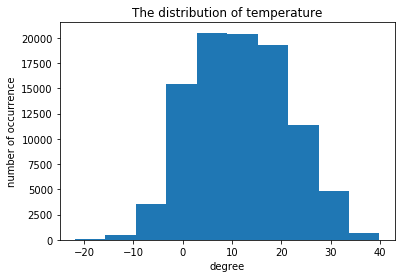

In [61]:
plt.hist(df["temperature"])

plt.xlabel("degree")
plt.ylabel("number of occurrence")
plt.title("The distribution of temperature")

In [62]:
df = df[["temperature", "humidity", "windspeed", "windbearing", "pressure"]]
df.head()

,temperature,humidity,windspeed,windbearing,pressure
0,9.472,0.890,14.120,251.000,1015.130
1,9.356,0.860,14.265,259.000,1015.630
2,9.378,0.890,3.928,204.000,1015.940
3,8.289,0.830,14.104,269.000,1016.410
4,8.756,0.830,11.045,259.000,1016.510


In [63]:
df.corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000,-0.632,0.009,0.030,-0.005
humidity,-0.632,1.000,-0.225,0.001,0.005
windspeed,0.009,-0.225,1.000,0.104,-0.049
windbearing,0.030,0.001,0.104,1.000,-0.012
pressure,-0.005,0.005,-0.049,-0.012,1.000


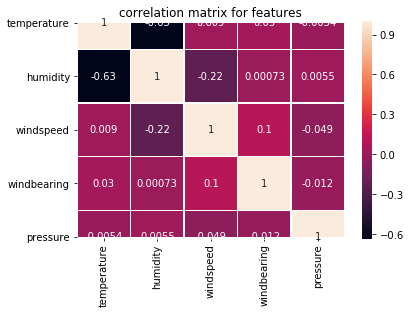

In [64]:
import seaborn as sns

sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for features")
plt.show()


## Build a regression model (estimation the model using OLS)

In [65]:
#Y is the target variable
Y = df["temperature"]

#X is the feature set which includes the following
X = df[["humidity", "windspeed", "windbearing","pressure"]]

#We create a LinearRegression model object from scikit-learn's linear model module.
lrm = linear_model.LinearRegression()

#fit method estimates the coefficients using OLS
lrm.fit(X, Y)

#Inspect the results

print("\nCoefficients: \n", lrm.coef_)
print("\nIntercept: \n", lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528537


LinearRegression()'s fit() method runs the OLS algorism by default. Since we get the parameters using OLS, we can write our estimated model:

Temperature = 37.92 - 32.5Humidity - 0.20 Wind speed +0.004 wind bearing - 0.00069 pressure



In [66]:
#now we run the same model with statsmodels.

import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:10:21   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Meeting the assumptions of linear regression

### Assumption one: linearity of the model in its coefficients


Coefficients: 
 [ 5.09233123e-03 -3.51052059e-06]

Intercept: 
 10.685774096616289


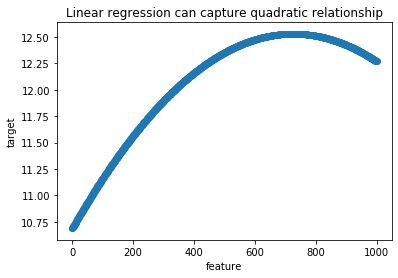

In [67]:
df1 = pd.DataFrame()

# data from 0 to 999
df1["X"] = np.arange(0,1000,1)
# we take the square of X
df1["X_sq"] = df1["X"]**2

# this is our equation: Temperature = 37.92 - 32.5Humidity - 0.20 Wind speed +0.004 wind bearing - 0.00069 pressure
df1["Y"] = 37.93 - 32.5*df['humidity'] - 0.21*df['windspeed'] + 0.004 *df['windbearing']  - 0.00069 * df['pressure']

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df1[["X","X_sq"]],df1["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df1[["X","X_sq"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df1["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [68]:
# NEED TO ASK!!!!!!

# df['Y'] = 37.93 - 32.5*df['humidity'] - 0.21*df['windspeed'] + 0.004 *df['windbearing']  - 0.00069 * df['pressure']


# lrm_example = linear_model.LinearRegression()
# lrm_example.fit(X, df["Y"])

# predictions = lrm_example.predict(X)

# print('\nCoefficients: \n', lrm_example.coef_)
# print('\nIntercept: \n', lrm_example.intercept_)

# plt.scatter(df["temperature"], predictions)
# plt.xlabel("feature")
# plt.ylabel("target")
# plt.title('Linear regression can capture quadratic relationship')
# plt.show()


### Assumption two: the error term should be zero on average

In [69]:
X = df[["humidity", "windspeed", "windbearing","pressure"]]
Y = df["temperature"]

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -1.9624955657832385e-15


Since, we include the constant term in the model, the average of the model's error is effectively zero.

### Assumption three: homoscedasticity

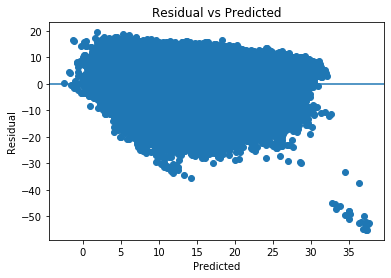

In [73]:
plt.scatter(predictions, errors)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

In [74]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

### Assumption four: low multicollinearity

Text(0.5, 1, 'Correlation matrix')

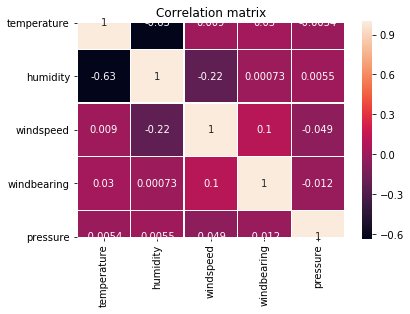

In [75]:
sns.heatmap(df.corr(), annot=True, linewidths = .3, square = True)
plt.title("Correlation matrix")

### Assumption five: error terms should be uncorrelated with one another

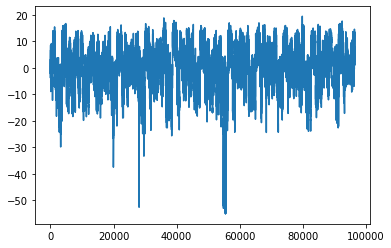

In [76]:
plt.plot(errors)
plt.show()

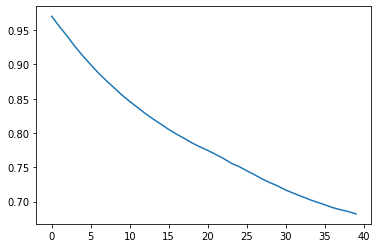

In [78]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

### Assumption six: features shouldn't be correlated with the errors

In [79]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], errors)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: humidity --- correlation: -0.0000, p-value: 1.0000
Variable: windspeed --- correlation: 0.0000, p-value: 1.0000
Variable: windbearing --- correlation: 0.0000, p-value: 1.0000
Variable: pressure --- correlation: 0.0000, p-value: 1.0000


### Assumption 7: normality of the errors

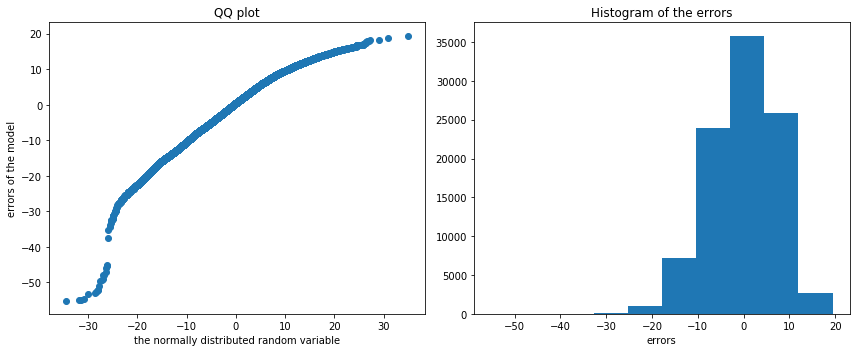

In [80]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [81]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [82]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252356 and p value is 0.0
Normality test statistics is 3375.4323076995797 and p value is 0.0
